In [4]:
!pip install pillow
!pip install rembg
!pip install scikit-image
!pip install opencv-python

In [ ]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt


### Remove background from the image

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 61.4GB/s]


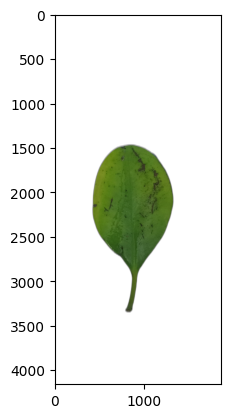

In [5]:
from rembg import remove
from PIL import Image

# Store path of the image in the variable input_path
path = "/content/drive/MyDrive/Image Processing/Leaf1.jpg"

# Store path of the output image(without background) in the variable output_path
output_path = "/content/drive/MyDrive/Image Processing/Leaf1NoBg.jpg"

# Processing the image
input_image = Image.open(path)

# Convert RGBA image to RGB
input_image = input_image.convert("RGB")

# Removing the background from the given Image
output = remove(input_image)

# Saving the image in the given path
output.save(output_path, format="PNG")

plt.imshow(output)

### Finding the grey-scaled image

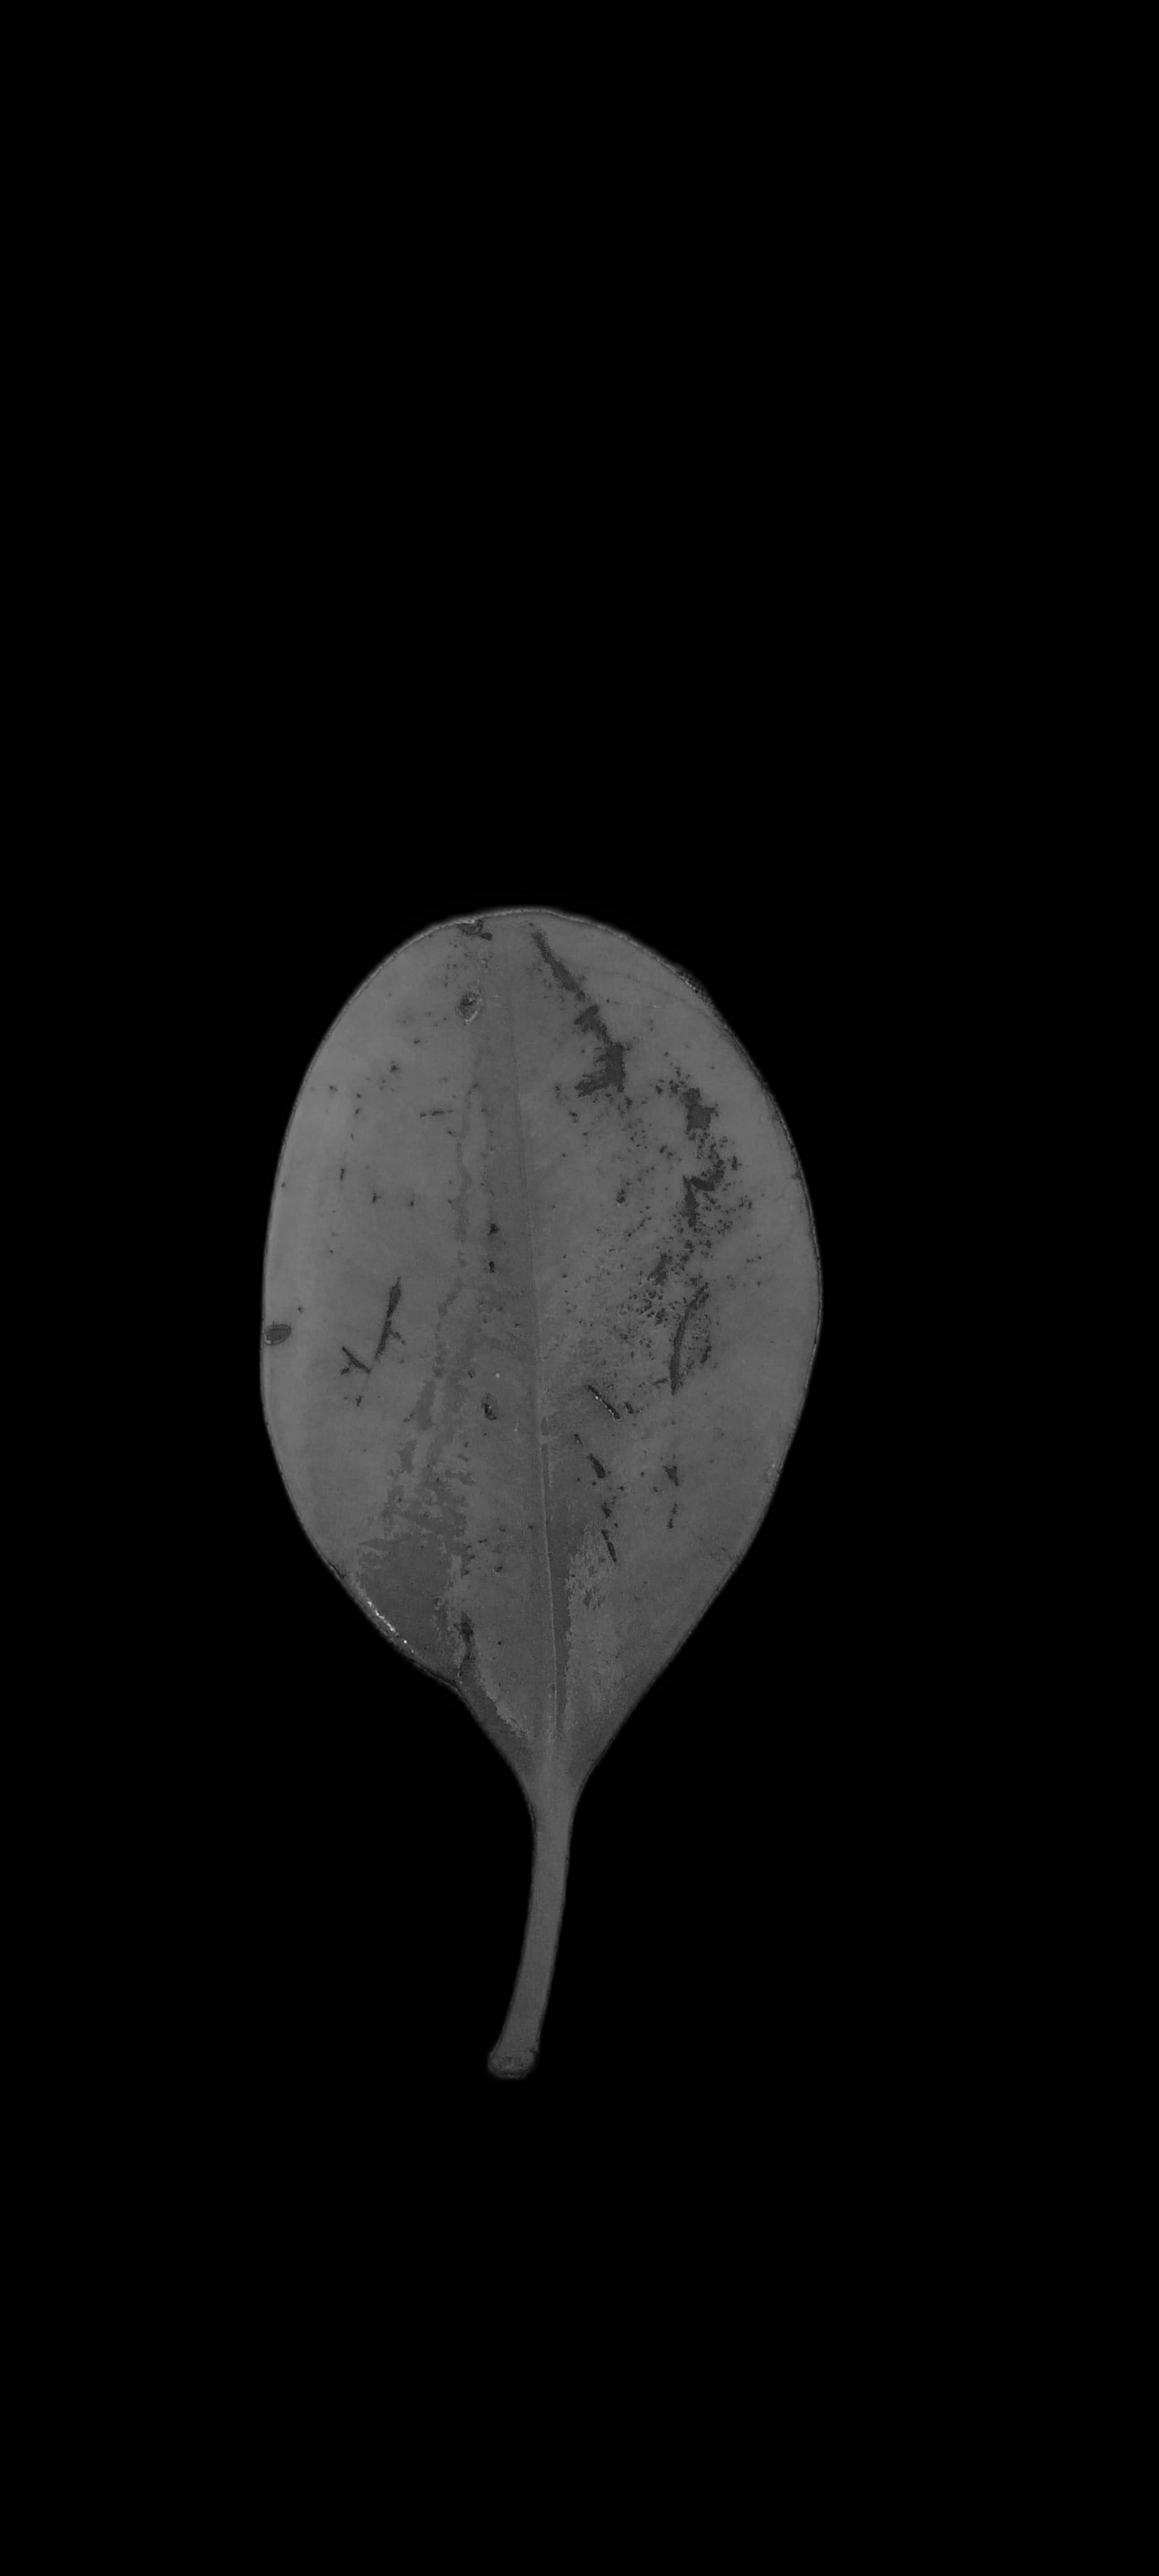

In [6]:
import cv2
from google.colab.patches import cv2_imshow
# path to no background image
path = path = "/content/drive/MyDrive/Image Processing/Leaf1NoBg.jpg"
grey_img = cv2.imread(path, 0)


cv2_imshow(grey_img);


### Canny edge detection

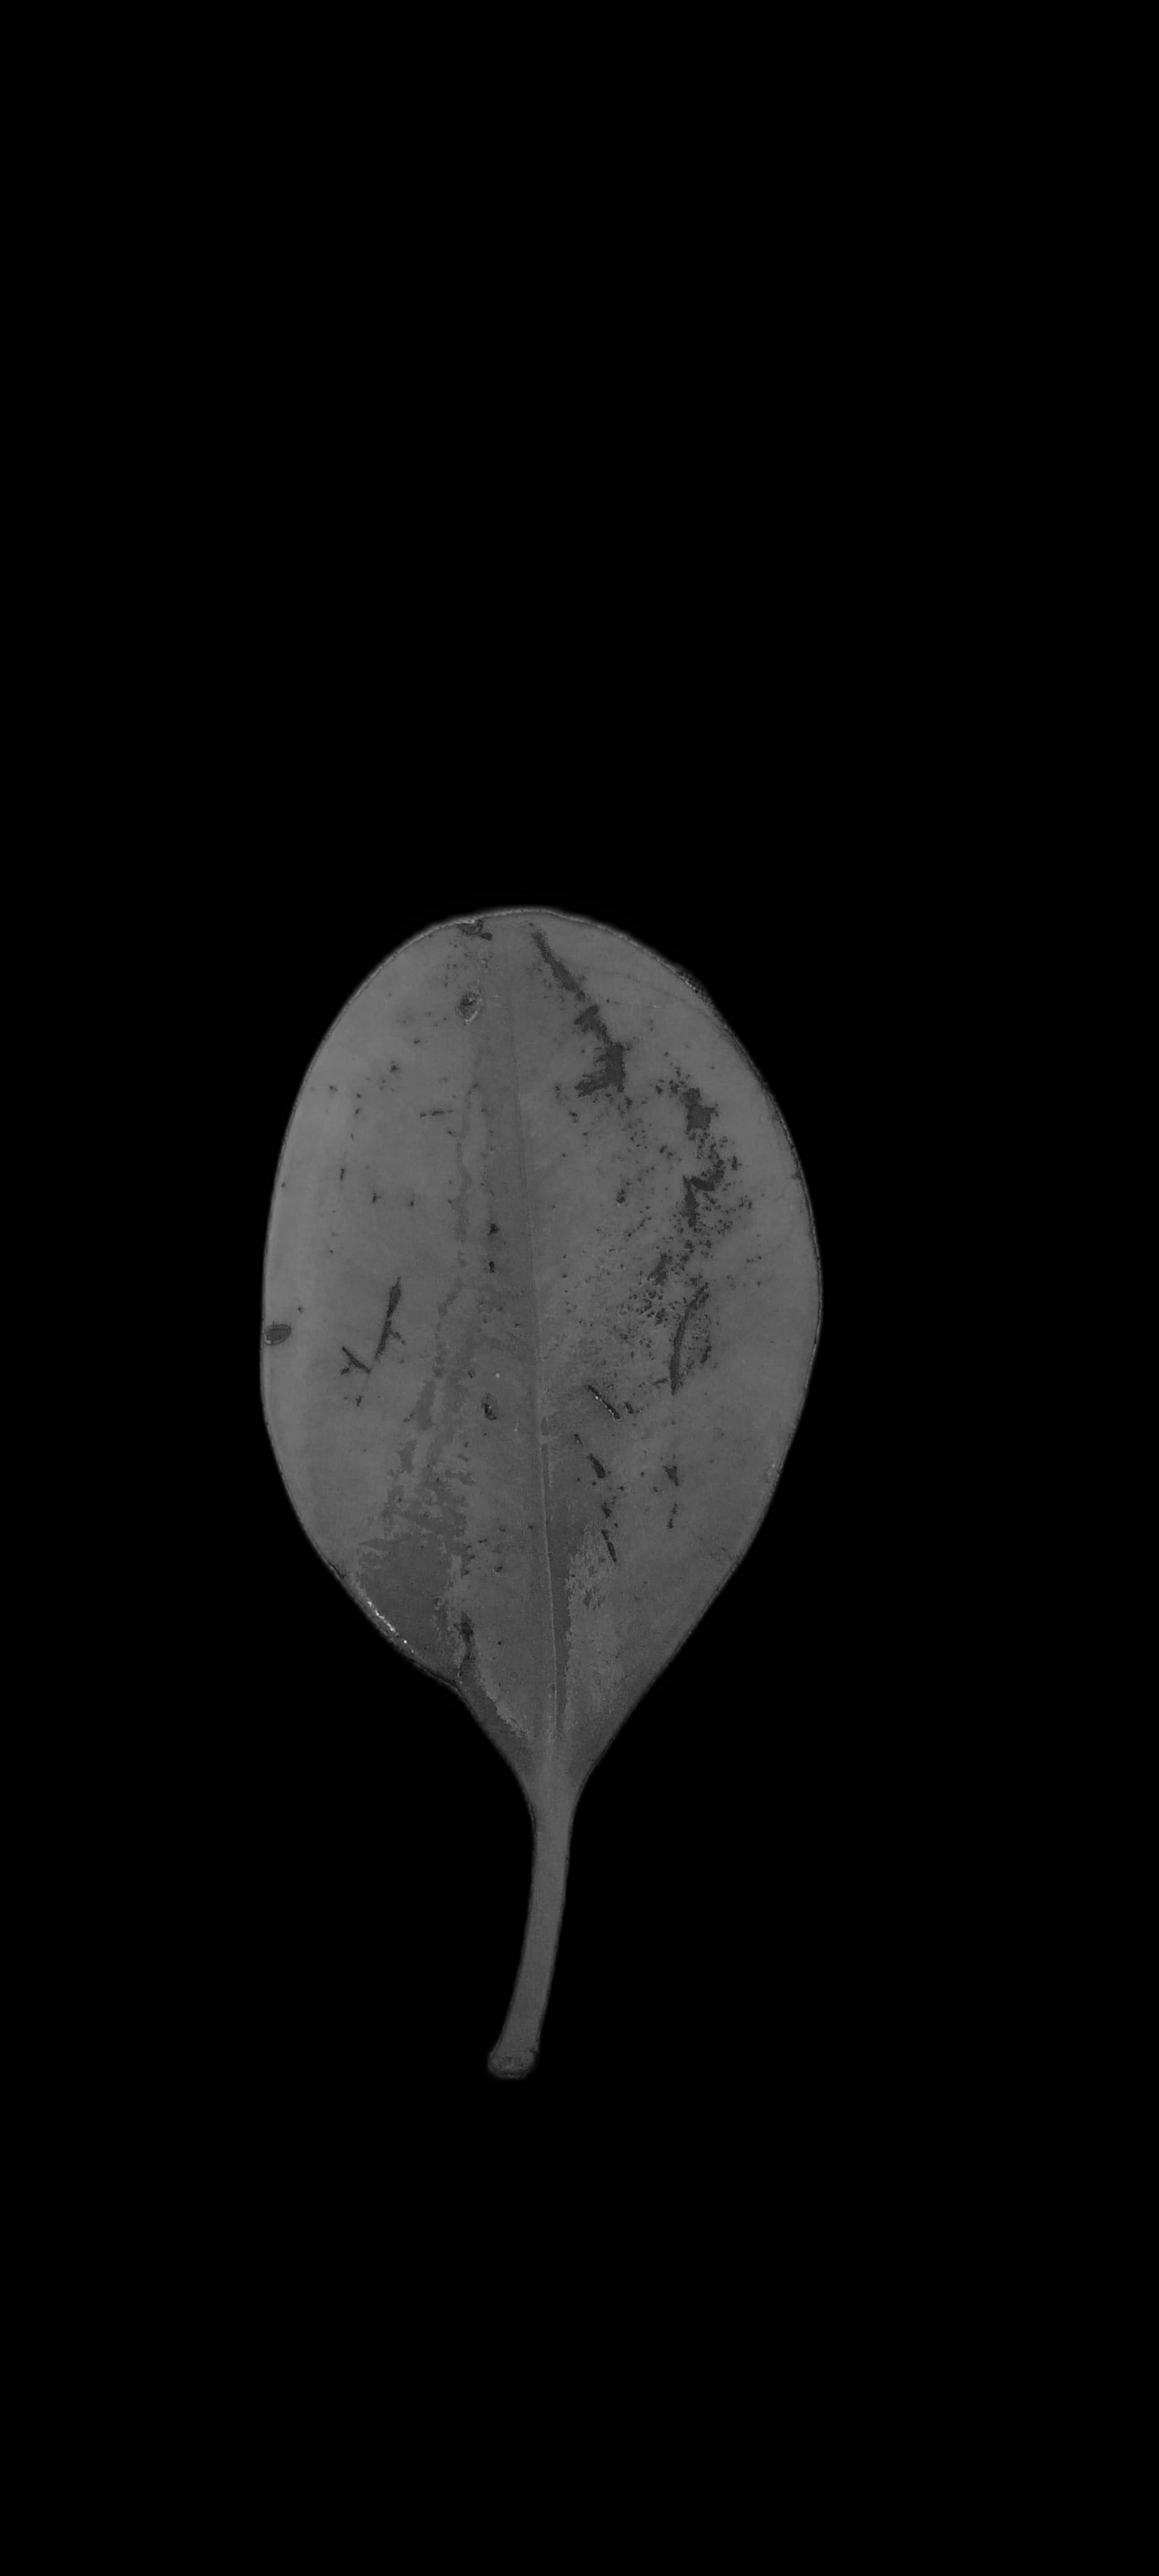

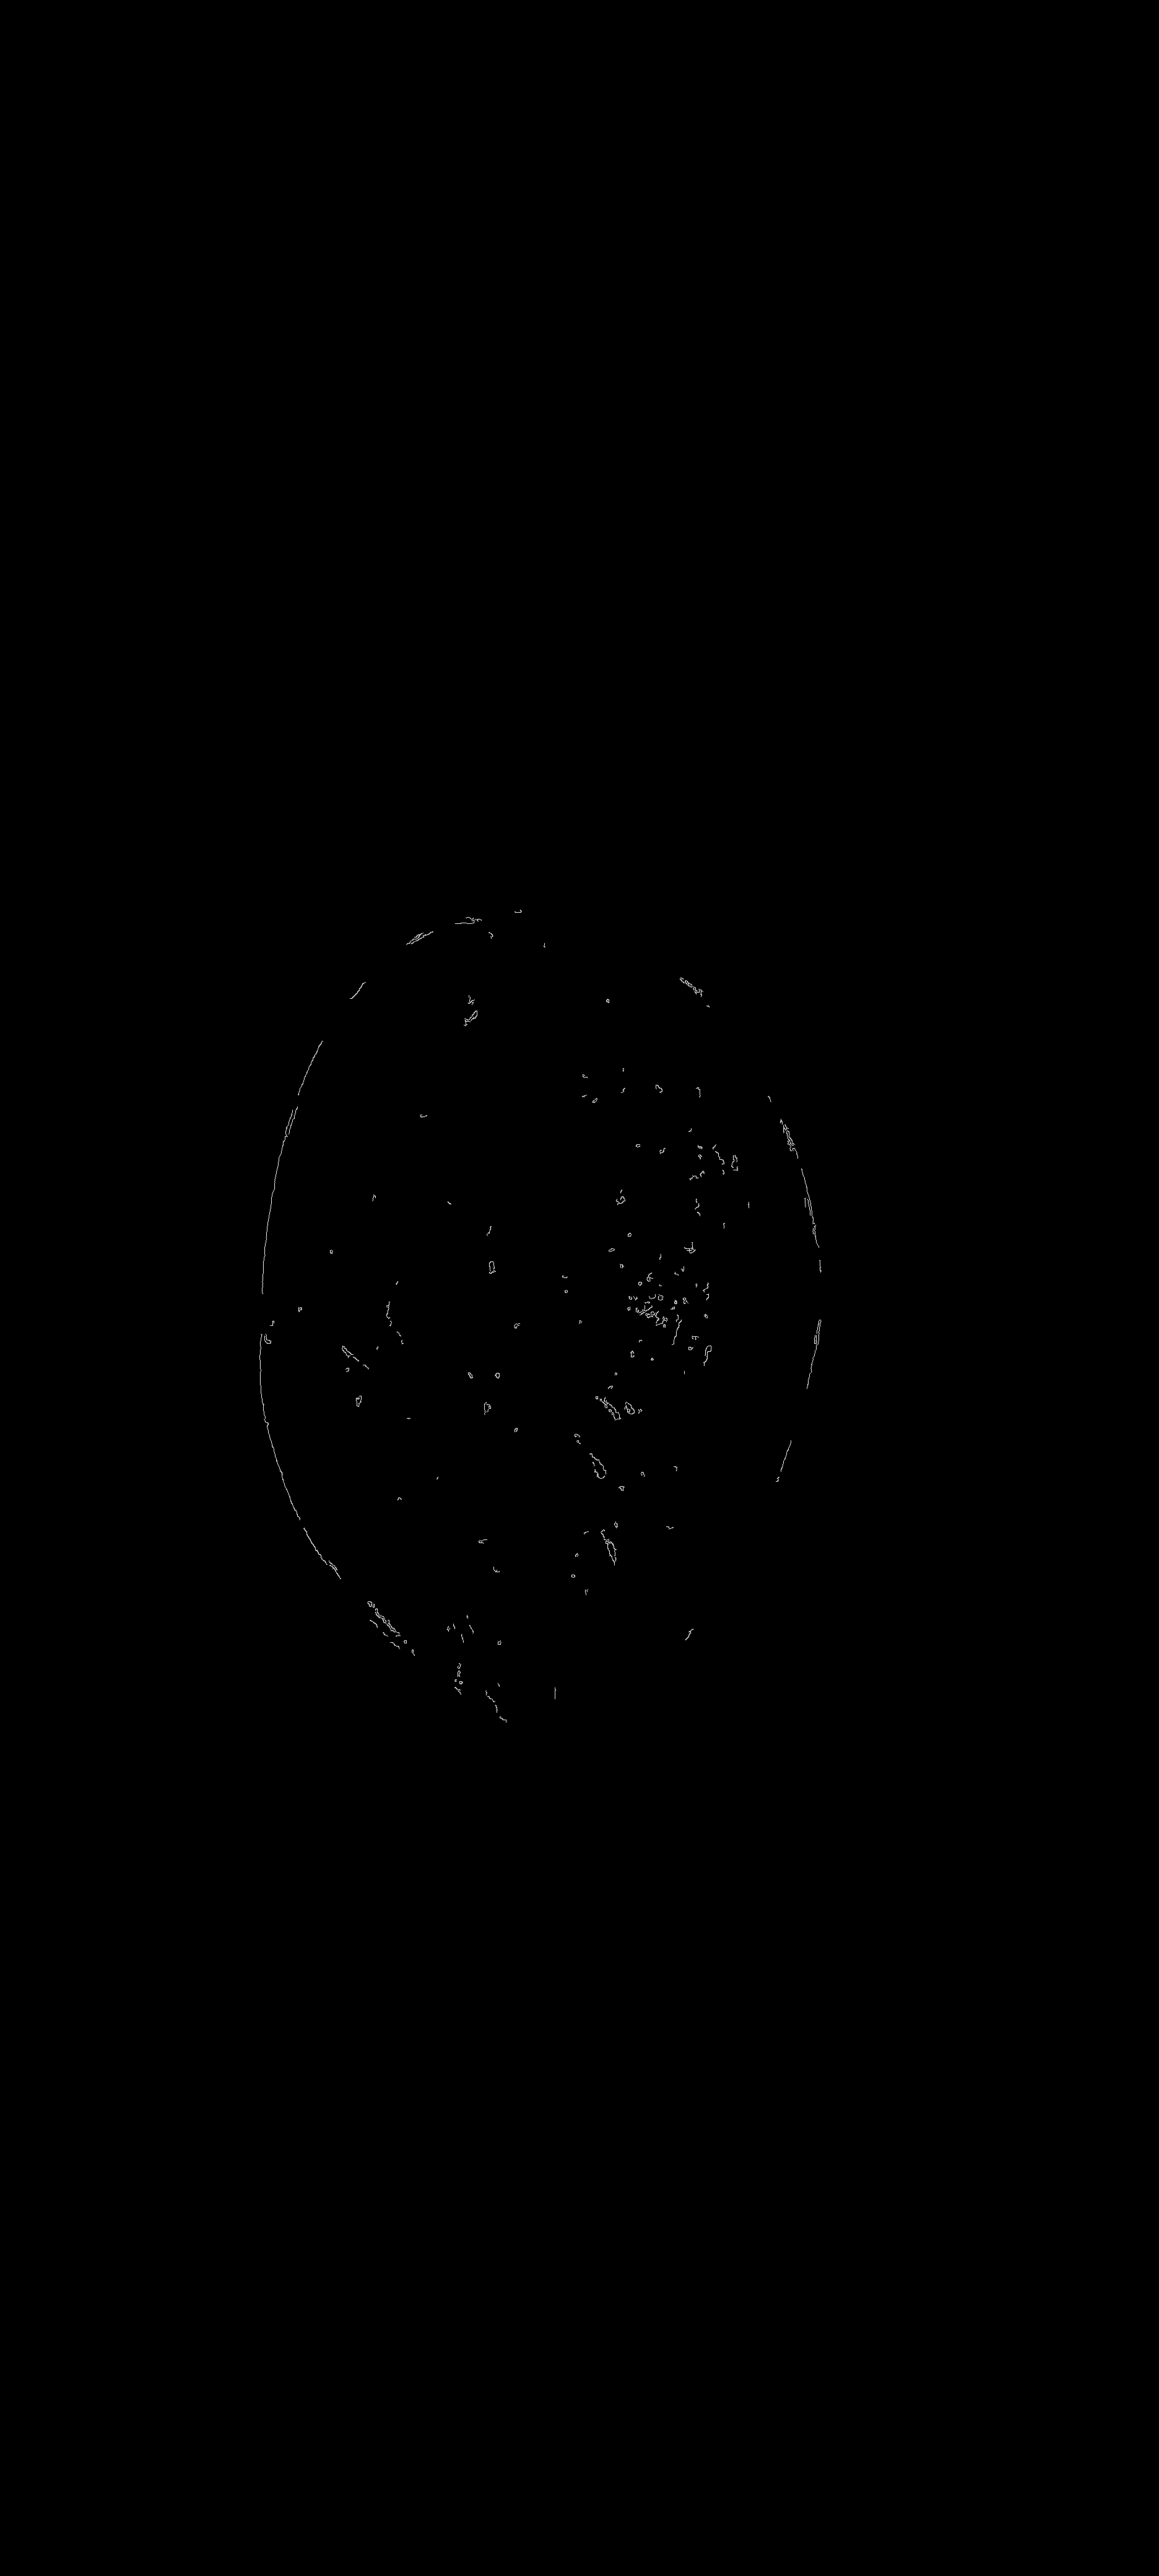

True

In [7]:
# path to no background image
path = path = "/content/drive/MyDrive/Image Processing/Leaf1NoBg.jpg"
img = cv2.imread(path, 0)

cv2_imshow(img)

edges = cv2.Canny(img, 100, 200)
cv2_imshow(edges)
# saving greyscale image
cv2.imwrite("/content/drive/MyDrive/Image Processing/Leaf1greyScale.jpg", img)
# saving edge detected image
cv2.imwrite("/content/drive/MyDrive/Image Processing/Leaf1EdgeDetected.jpg", edges)

### Box counting method to find fractal dimension

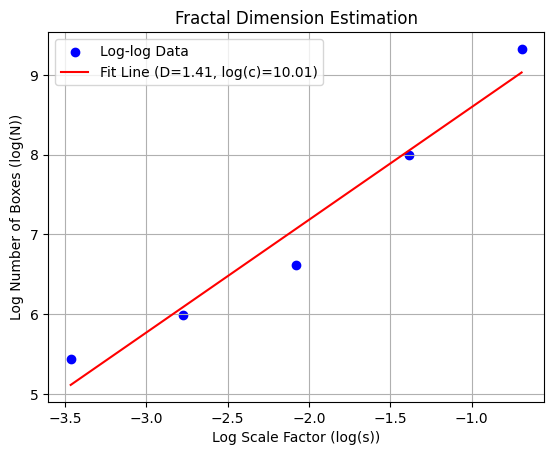

Fractal Dimension: 1.4140577385346835
Log(c): 10.012449860263667


In [8]:
path = "/content/drive/MyDrive/Image Processing/Leaf1EdgeDetected.jpg"
img = cv2.imread(path,0)

import cv2
import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np
import matplotlib.pyplot as plt

def box_count(image, box_size):
    # Get the dimensions of the image
    height, width = image.shape

    # Initialize the count of boxes containing part of the image
    count = 0

    # Iterate through the image in steps of box_size
    for y in np.arange(0, height, box_size):
        for x in np.arange(0, width, box_size):
            # Extract the region of interest (ROI)
            roi = image[y:y+box_size, x:x+box_size]
            '''
            y:y+box_size: This part specifies the range of rows to be extracted from the image.
            It starts from row index y and ends at row index y + box_size - 1.

            x:x+box_size: this part specifies the range of columns to be extracted from the image.
            It starts from column index x and ends at column index x + box_size - 1.
            '''

            # Check if the ROI contains any non-zero pixel (edge)
            if np.sum(roi) > 0:
                count += 1

    return count

def calculate_fractal_dimension(image_path, box_sizes):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Initialize an empty list to store the counts for each box size
    counts = []

    # Perform box counting for each box size
    for size in box_sizes:
        count = box_count(image, size)
        counts.append(count)

    # Calculate the fractal dimension using linear regression
    # We use log-log scale for box counts and box sizes
    x = np.log(1.0 / np.array(box_sizes))
    y = np.log(np.array(counts))

    # Fit a linear regression line (polynomial of degree 1)
    coeffs = np.polyfit(x, y, 1)

    # The slope of the line represents the fractal dimension
    fractal_dimension = coeffs[0]
    log_c = coeffs[1]

    # Plot log(N) = D * log(s) + log(c)
    plt.scatter(x, y, color='blue', label='Log-log Data')
    plt.plot(x, coeffs[0] * x + log_c, color='red', label=f'Fit Line (D={fractal_dimension:.2f}, log(c)={log_c:.2f})')
    plt.xlabel('Log Scale Factor (log(s))')
    plt.ylabel('Log Number of Boxes (log(N))')
    plt.title('Fractal Dimension Estimation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return fractal_dimension, log_c

if __name__ == "__main__":
    # Path to the edge detected image
    image_path = "/content/drive/MyDrive/Image Processing/Leaf1EdgeDetected.jpg"

    # Define a range of box sizes (powers of 2 are commonly used)
    box_sizes = [ 2, 4, 8, 16, 32]

    # Calculate the fractal dimension
    fractal_dimension, log_c = calculate_fractal_dimension(image_path, box_sizes)

    print("Fractal Dimension:", fractal_dimension)
    print("Log(c):", log_c)